In [6]:
import configProj1
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# connect to DB

cnx = mysql.connector.connect(
    host = configProj1.host,
    user = configProj1.user,
    passwd = configProj1.password,
    database = 'Movies'
)

cursor = cnx.cursor()

In [3]:
query2 = ('''
        WITH a AS (
            SELECT o.metascore, AVG(o.imdb_rating), d.director,
              FLOOR((o.metascore)/10) AS metascore_buckets,
              COUNT(*) AS bucket_count
            FROM
              Movies.OMDb_Directors d
            JOIN
              Movies.OMDb_Top_250_and_Low_100 o
            ON
              d.movie_name = o.movie_name
            GROUP BY
              metascore_buckets, d.director
            ORDER BY
              metascore_buckets DESC, bucket_count DESC)

        SELECT *
        FROM a
        WHERE
          metascore_buckets > 7
        AND
          bucket_count > 1;
        ''')
cursor.execute(query2)
db2 = cursor.fetchall()

In [17]:
query3 = ('''
        WITH a AS (
            SELECT 
              d.director,
              FLOOR((o.metascore)/10) AS metascore_buckets,
              COUNT(*) AS bucket_count
            FROM
              Movies.OMDb_Directors d
            JOIN
              Movies.OMDb_Top_250_and_Low_100 o
            ON
              d.movie_name = o.movie_name
            GROUP BY
              metascore_buckets, d.director
            ORDER BY
              metascore_buckets DESC, bucket_count DESC)

        SELECT
          director,
          bucket_count
        FROM a
        WHERE
          metascore_buckets > 7
        AND
          bucket_count > 1;
        ''')
cursor.execute(query3)
db3 = cursor.fetchall()

In [20]:
df3 = pd.DataFrame(db3)
df3.columns = ['Director', 'Freq']
df3

,Director,Freq
0,Alfred Hitchcock,2
1,Francis Ford Coppola,3
2,Billy Wilder,3
3,Akira Kurosawa,3
4,Steven Spielberg,2
5,Peter Jackson,2
6,Alfred Hitchcock,2
7,Andrew Stanton,2
8,Charles Chaplin,2
9,Stanley Kubrick,3


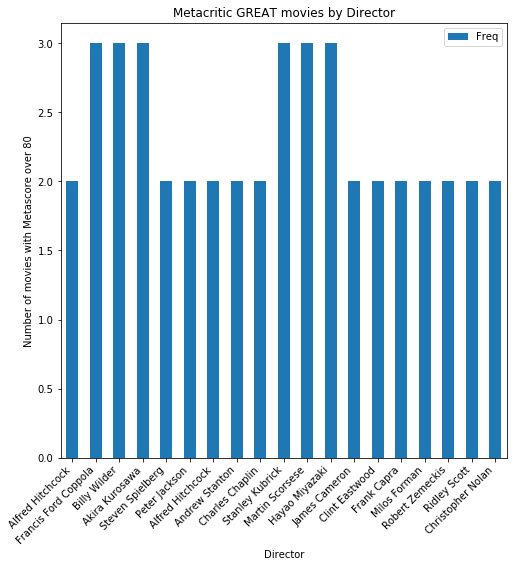

In [42]:
ax = df3.plot(x='Director', y='Freq', kind='bar', title='Metacritic GREAT movies by Director', figsize=(8,8))
ax.set_ylabel('Number of movies with Metascore over 80')
ax.set_xticklabels(df3['Director'], rotation=45, ha='right');

In [ ]:
query = ('''
        SELECT o.movie_name, o.metascore, o.imdb_rating, d.director
        FROM Movies.OMDb_Directors d
        JOIN Movies.OMDb_Top_250_and_Low_100 o
        ON d.movie_name = o.movie_name
        ORDER BY o.metascore DESC;
        ''')
cursor.execute(query)
db = cursor.fetchall()

In [ ]:
df = pd.DataFrame(db)
df.columns = ['Title', 'Metascore', 'IMDb User Rating', 'Director']
df.head()

In [ ]:
director_df = df.groupby('Director')['Title'].count()

In [ ]:
cursor.close()
cnx.close()

### Using .split( ) and .strip( ) methods to separate comma-separated string elements, and then eliminate white space

In [ ]:
x = 'Martin Scorcese, Guillermo del Toro, Tim Robbins, Christopher Nolan '

In [ ]:
y = x.split(',')
y

In [ ]:
list((y[i].strip() for i in range(0,len(y))))

In [ ]:
len(y)